In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


## Loading the data

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Exploration

In [4]:
test_data.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


In [5]:
train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Exploratory Data Analysis

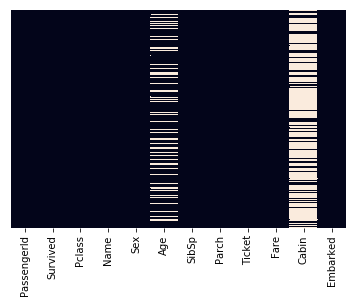

In [10]:
sns.heatmap(train_data.isnull(),cbar=False,yticklabels=False)

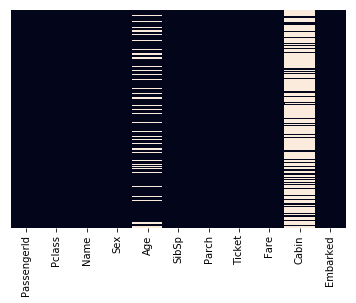

In [11]:
sns.heatmap(test_data.isnull(),cbar=False,yticklabels=False)

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


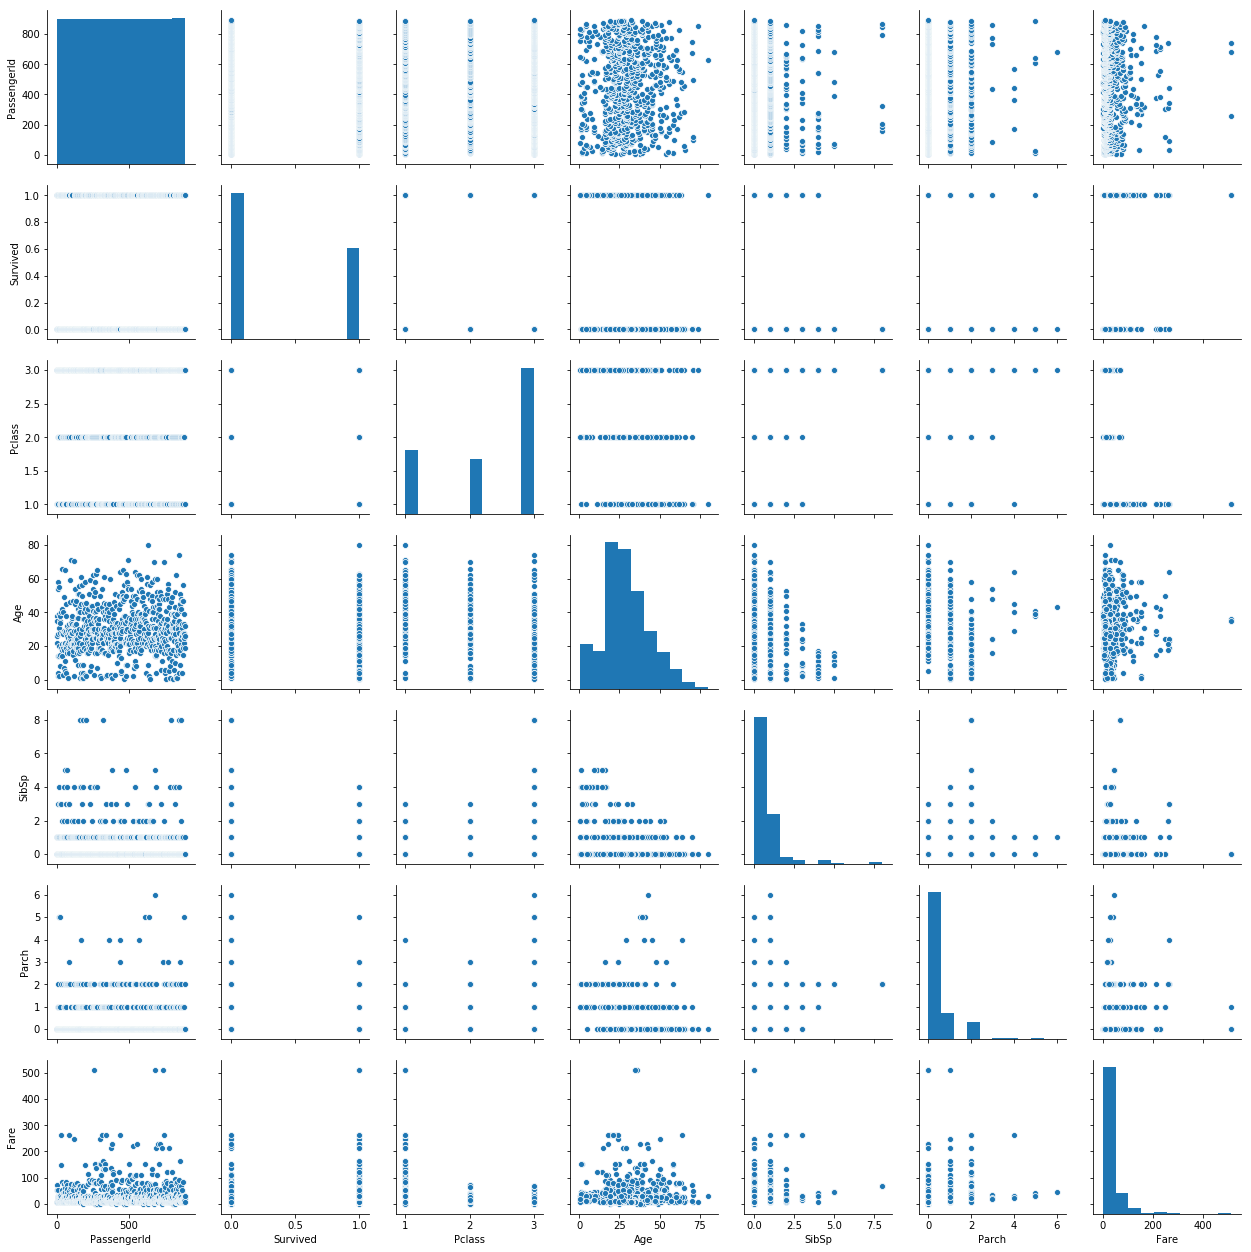

In [12]:
sns.pairplot(train_data)

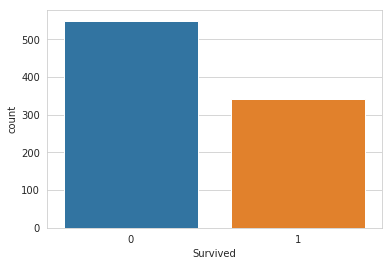

In [13]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived',data=train_data)

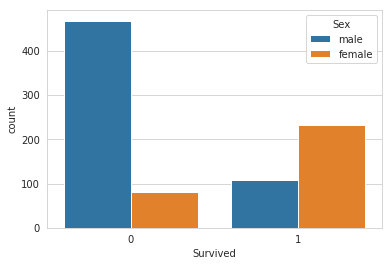

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train_data)

As we can see above female has almost double the chance of survival while the men represent the disproportionate number who failed to survive.

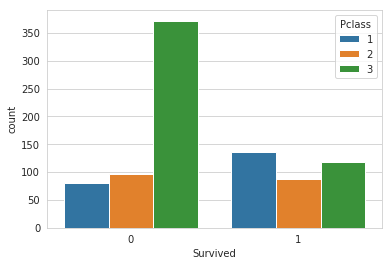

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train_data)

Passengers in first class have more chance of survival while those in third class wil have greater chances of fatality.

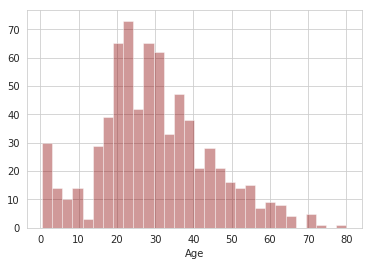

In [16]:
sns.distplot(train_data['Age'].dropna(),kde=False,color='darkred',bins=30)

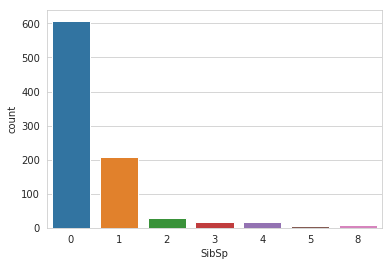

In [17]:
sns.countplot(x='SibSp',data=train_data)

From the above graph we can infer that most of the people were travelling alone.

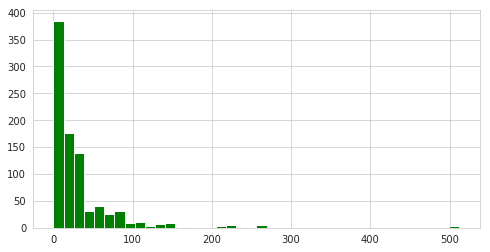

In [18]:
train_data['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [19]:
import cufflinks as cf
cf.go_offline()
train_data['Fare'].iplot(kind='hist',bins=30,color='green')

In [20]:
train_data['Age'].iplot(kind='hist',bins=30,color='green')

## Data Cleaning and Processing

In this process we will remove the null values in age column.
Since there is a lot of data that is missing in the cabin we drop this column all together.

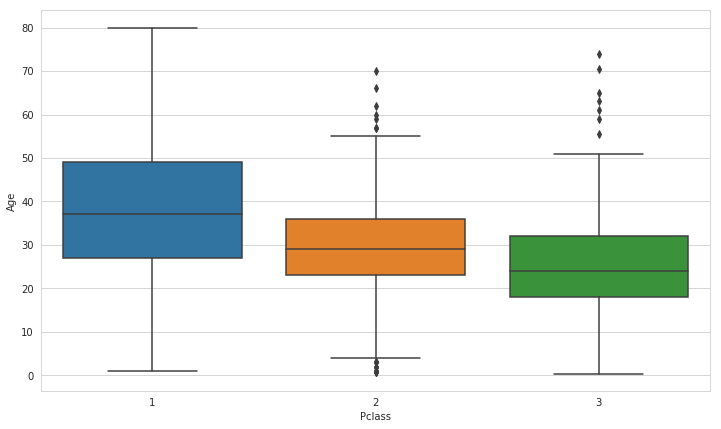

In [21]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train_data)

As we can see that average age of people in higher class is greater than those in second class. Those in second class have average age higher than that of the third class.

Calculation of the average age by passenger class and then filling the missing data in the age column.

In [22]:
train_data.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [23]:
def add_age(columns):
    age = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(age):
        if Pclass == 1:
            return 38.23
        elif Pclass == 2:
            return 29.87
        else:
            return 25.14
        
    else:
        return age
        

Adding the age values in both train and test data

In [24]:
train_data['Age'] = train_data[['Age','Pclass']].apply(add_age,axis=1)
test_data['Age'] = test_data[['Age','Pclass']].apply(add_age,axis=1)

In [25]:
def add_fare(columns):
    fare = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(fare):
        if Pclass == 1:
            return 84.15
        elif Pclass == 2:
            return 20.66
        else:
            return 13.67
        
    else:
        return fare

In [26]:
train_data['Fare'] = train_data[['Fare','Pclass']].apply(add_fare,axis=1)
test_data['Fare'] = test_data[['Fare','Pclass']].apply(add_fare,axis=1)

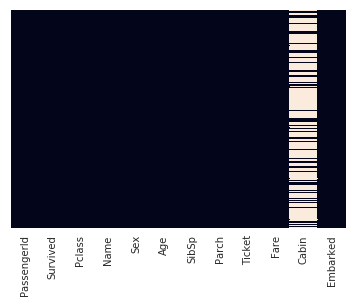

In [27]:
sns.heatmap(train_data.isnull(),cbar=False,yticklabels=False)

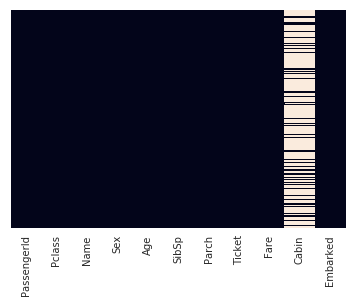

In [28]:
sns.heatmap(test_data.isnull(),cbar=False,yticklabels=False)

Dropping the cabin column altogether in both the dataset.

In [29]:
train_data.drop('Cabin',axis=1,inplace=True)
test_data.drop('Cabin',axis=1,inplace=True)

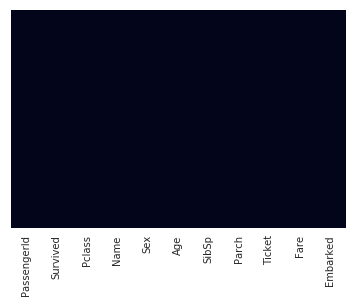

In [30]:
sns.heatmap(train_data.isnull(),cbar=False,yticklabels=False)

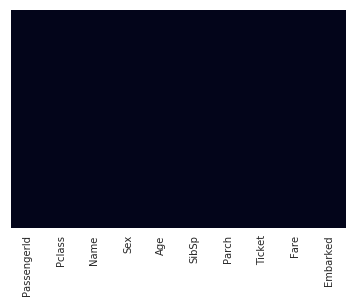

In [31]:
sns.heatmap(test_data.isnull(),cbar=False,yticklabels=False)

Now we will convert the categorical data in number format. We will work with both datasets. We will work with Sex,Embark and Pclass columns.

In [32]:
sex_train = pd.get_dummies(train_data['Sex'],drop_first=True)
embark_train = pd.get_dummies(train_data['Embarked'],drop_first=True)
pclass_train = pd.get_dummies(train_data['Pclass'],drop_first=True)
sex_test = pd.get_dummies(test_data['Sex'],drop_first=True)
embark_test = pd.get_dummies(test_data['Embarked'],drop_first=True)
pclass_test = pd.get_dummies(test_data['Pclass'],drop_first=True)

In [33]:
train_data = pd.concat([train_data,sex_train,embark_train,pclass_train],axis=1)
test_data = pd.concat([test_data,sex_test,embark_test,pclass_test],axis=1)

In [34]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [35]:
train_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [36]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,1


In [37]:
test_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,892,3,34.5,0,0,7.8292,1,1,0,0,1
1,893,3,47.0,1,0,7.0000,0,0,1,0,1
2,894,2,62.0,0,0,9.6875,1,1,0,1,0
3,895,3,27.0,0,0,8.6625,1,0,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1,0,1


Since passenger Id is randomly generated we will remove this column in our training data and we will keep this in test data so as to give output in the desired format.

In [38]:
train_data.drop(['PassengerId'],axis=1,inplace=True)
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


## Logistic Regression Model

Assigning the data.

In [39]:
train_data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S',
       2, 3],
      dtype='object')

In [40]:
X_train = train_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S',2, 3]]
y_train = train_data['Survived']
X_test = test_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S',2, 3]]

In [41]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



## Submitting the output

In [42]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission_logistic.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
